In [1]:
import pandas as pd

In [34]:
df = pd.read_csv('bitcoin.csv')

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [36]:
df.shape

(2713, 7)

In [37]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price in dollars.')

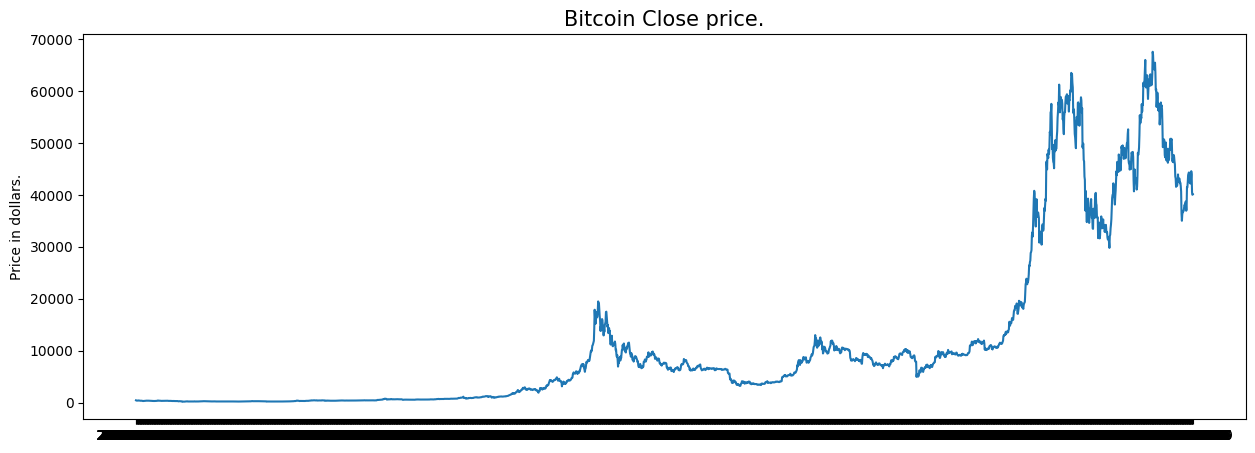

In [39]:
plt.figure(figsize=(15, 5))
plt.plot(df.Date,df.Close)
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')

In [40]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [41]:
features = ['Open','High','Low','Close']

In [42]:
import seaborn as sn

C:\Users\User\AppData\Local\Temp\ipykernel_17224\61042087.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col])
C:\Users\User\AppData\Local\Temp\ipykernel_17224\61042087.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col])
C:\Users\User\AppData\Local\Temp\ipykernel_17224\61042087.py

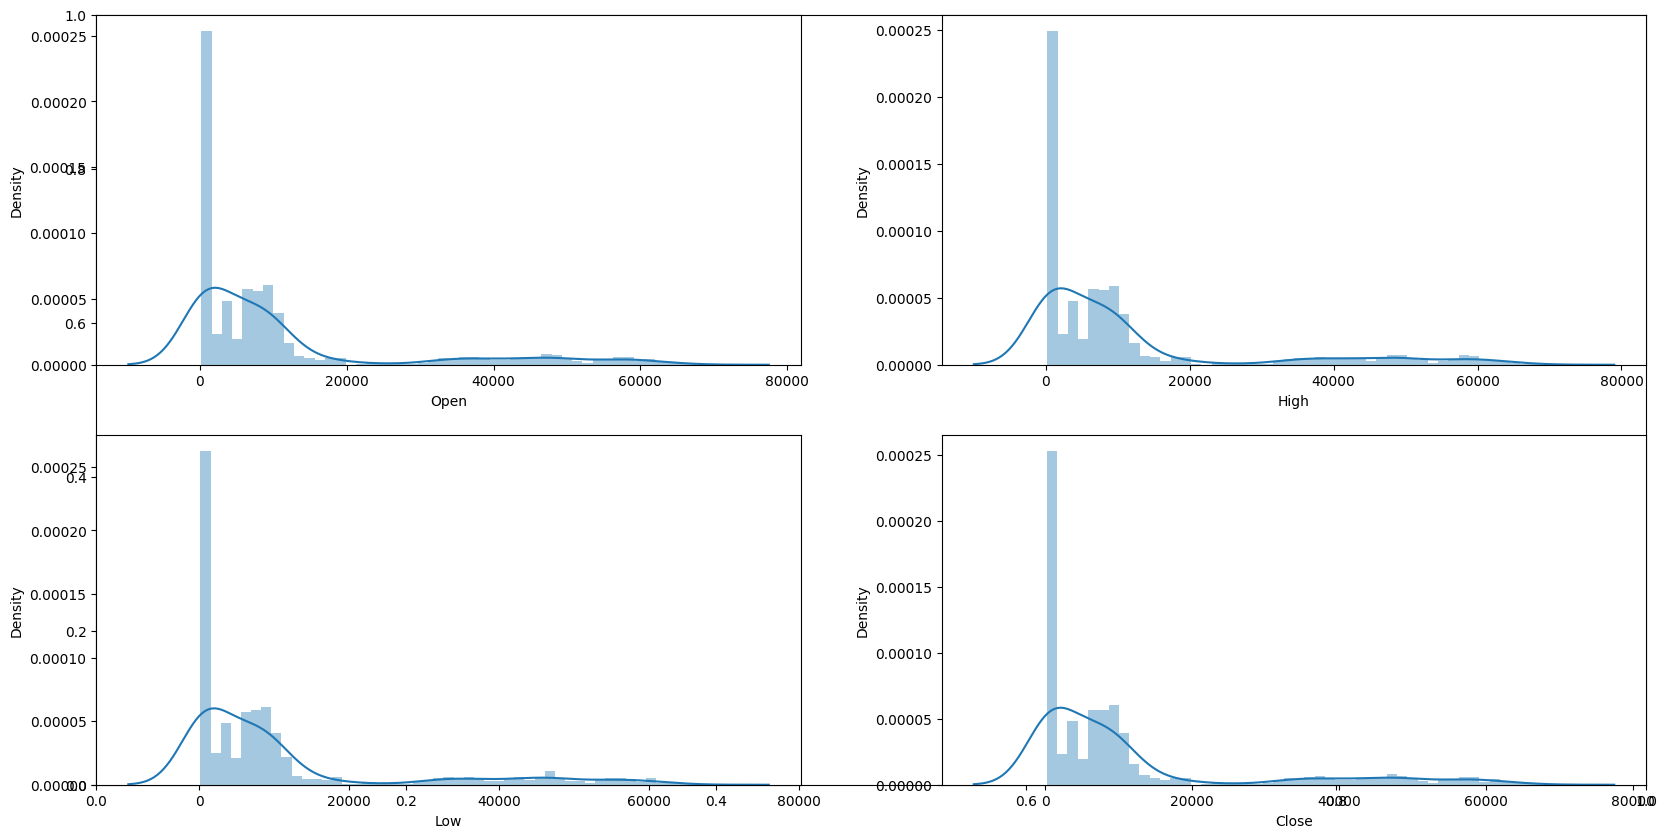

In [43]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sn.distplot(df[col])
plt.show()

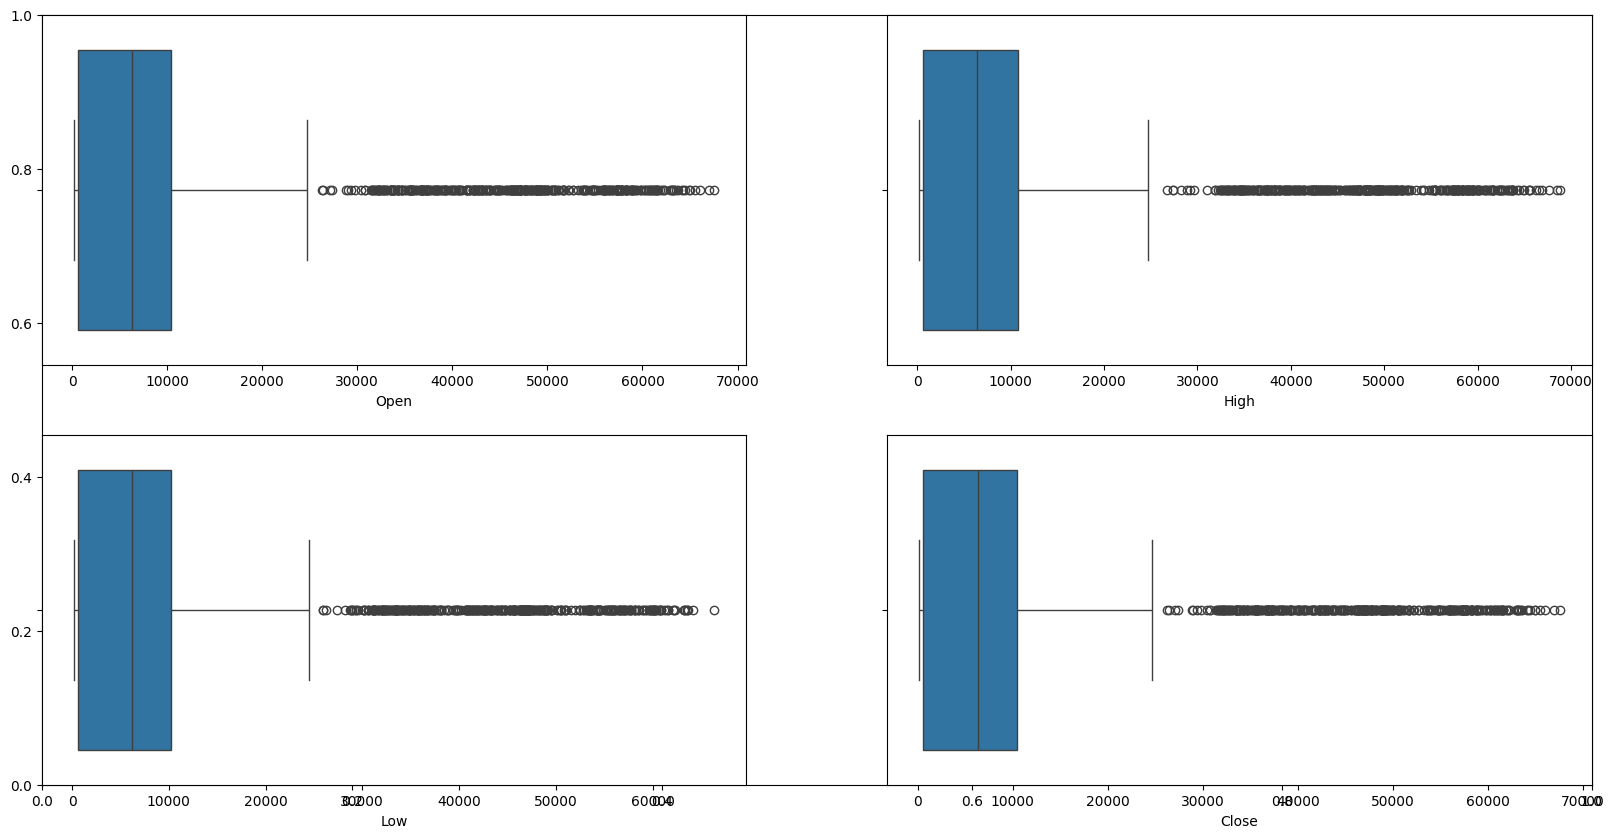

In [44]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sn.boxplot(df[col], orient='h')
plt.show()

In [45]:
expand = df['Date'].str.split('-', expand=True)

In [47]:
df['Year'] = expand[0].astype('int')
df['Month'] = expand[2].astype('int')
df['Day'] = expand[2].astype('int')

In [48]:
df.Date = pd.to_datetime(df.Date)

In [50]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,17,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,18,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,19,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,20,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,21,21


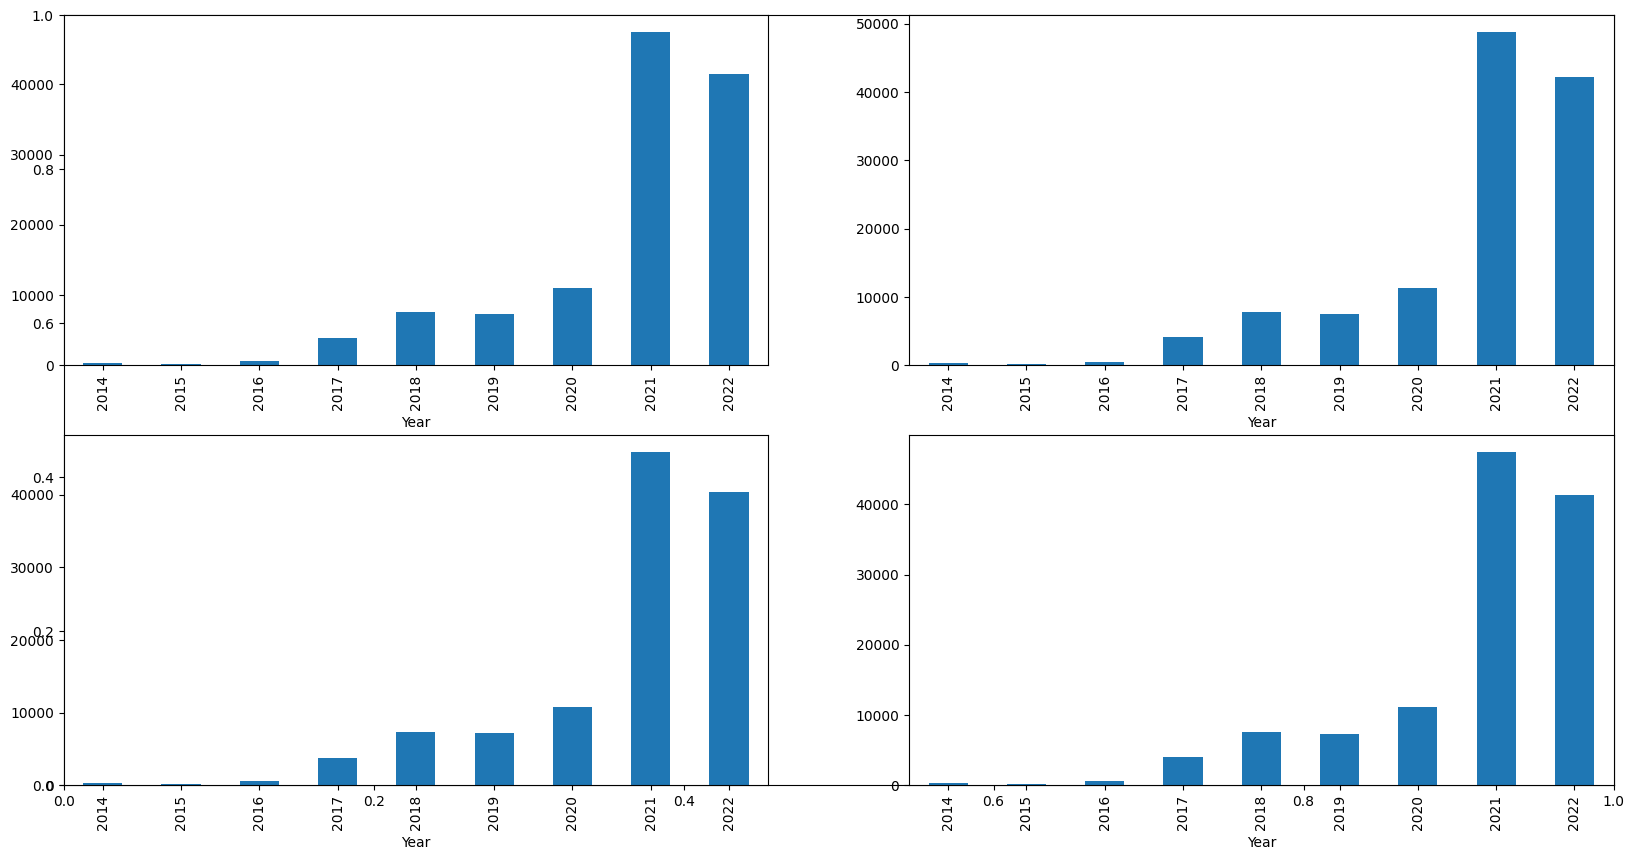

In [52]:
data_grouped = df.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [53]:
import numpy as np

In [55]:
df['target'] = np.where(df.Close.shift(-1)>df.Close,1,0)

In [57]:
df.target.value_counts()

target
1    1469
0    1244
Name: count, dtype: int64

In [67]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,17,17,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,18,18,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,19,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,20,20,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,21,21,1


In [70]:
df['openclose'] = df.Open - df.Close
df['highlow'] = df.High - df.Low
df['endofquater'] = np.where(df['Month']% 3 == 0,1,0)

In [72]:
features  = df[['openclose','highlow','endofquater']]
target = df.target

In [64]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [66]:
model1 = SVC()
model2 = RandomForestClassifier()

In [117]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict

In [61]:
kf = KFold(n_splits= 5)

In [73]:
score = cross_val_score(model1,features,target,cv = kf)

In [74]:
score

array([0.50828729, 0.61141805, 0.52854512, 0.5295203 , 0.54612546])

In [78]:
print("accuracy of the svc model  : ",score.mean())

accuracy of the svc model  :  0.5447792433725442


In [119]:
from sklearn.metrics import accuracy_score

In [80]:
score1 = cross_val_score(model2,features,target,cv = kf)

In [81]:
score1

array([0.49723757, 0.47882136, 0.47697974, 0.47232472, 0.48154982])

In [82]:
print("accuracy of the svc model  : ",score1.mean())

accuracy of the svc model  :  0.4813826425557073


In [84]:
!pip install xgboost



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 3.4 MB/s eta 0:00:45
   ---------------------------------------- 1.8/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 2.9/150.0 MB 4.3 MB/s eta 0:00:35
    --------------------------------------- 3.7/150.0 MB 4.4 MB/s eta 0:00:34
   - -------------------------------------- 4.7/150.0 MB 4.5 MB/s eta 0:00:33
   - -------------------------------------- 5.8/150.0 MB 4.6 MB/s eta 0:00:32
   - -------------------------------------- 6.8/150.0 MB 4.6 MB/s eta 0:00:32
   - -------------------------------------- 7.3/150.0 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 8.7/150.0 MB 4.5 MB/s eta 0:00:32
   -- ------------------------------------- 9.7/150.0 MB 4.6 MB/s eta 0:00:31
   -- ------------------------------------- 10.5/150.0 MB 4.6 MB/s eta 0:00:3

In [85]:
from xgboost import XGBClassifier

In [95]:
model3 = XGBClassifier()
model4 = XGBClassifier()

In [88]:
score3 = cross_val_score(model3,features,target,cv = kf)

In [89]:
score3

array([0.49171271, 0.50828729, 0.48987109, 0.51660517, 0.48708487])

In [90]:
score3.mean()

0.4987122246913077

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size= 0.2)

In [96]:
model4.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [97]:
model4.predict(x_test)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [98]:
model4.score(x_test,y_test)

0.4953959484346225

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
ft = scaler.fit_transform(features)

In [110]:
xtrain,xtest,ytrain,ytest = train_test_split(ft,target,test_size=0.3,random_state=42)

In [111]:
model5 = XGBClassifier()

In [112]:
model5.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [113]:
model5.score(xtest,ytest)

0.4914004914004914

In [114]:
model5.score(xtrain,ytrain)

0.8493944181147972

In [116]:
model4.score(x_train,y_train)

0.8400921658986175